# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the data
df = pd.read_csv("./data/movies.csv")
#Visualising the first 10 rows
df.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [3]:
#Size of the DataFrame
df.shape

(9999, 9)

In [4]:
#Size and the number of missing data points per column
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [5]:
#Replace the original dataset
data = df.copy(deep=True)
#Calculating median value
median = data.RATING.median()
#Fill the NaN values
data.fillna({'YEAR': 'Unkown'}, inplace=True)
data.fillna({'GENRE':'Unkown'}, inplace=True)
data.fillna({'RATING': median}, inplace=True)
data.fillna({'VOTES': '0'}, inplace=True)
#Verifying the result
print(df.YEAR.isna().sum())
print(data.YEAR.isna().sum())

644
0


**1.4 Drop the duplicated rows**

In [9]:
data.drop_duplicates(inplace=True)
#Verifying
print(data.shape[0], df.shape[0])

9568 9999


**1.5 Replace the columns names to make them all lowercase**

In [10]:
#Replacing columns names
data.columns = ['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes', 'runtime', 'gross']

In [11]:
#Verifying outcome
data

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",7.1,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,0,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,0,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.1,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,0,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,0,NaN,NaN


**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [13]:
data['votes'] = data['votes'].str.replace(',', '').astype(float)

## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [15]:
average_rating = data['rating'].mean()
print(average_rating)

6.94608068561873


**2.2 What is the maximum runtime?**

In [16]:
print(data['runtime'].max())

853.0


**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [20]:
#El tiempo entre costuras has the longest runtime
data_sorted_rt = data.sort_values(by='runtime', ascending=False)
data_sorted_rt.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
1902,El tiempo entre costuras,(2013–2014),"\nAdventure, Drama, History",8.3,\nSira Quiroga is a young Spanish dressmaker e...,"\n \n Stars:\nAdriana Ugarte, \n...",3876.0,853.0,NaN
1081,Soupçons,(2004–2018),"\nDocumentary, Crime, Drama",7.9,\nThe high-profile murder trial of American no...,"\n \n Stars:\nMichael Peterson, ...",20200.0,629.0,NaN
2498,The Innocence Files,(2020),"\nDocumentary, Crime",8.0,\nCases of wrongful conviction that the Innoce...,"\n \n Stars:\nPeter Neufeld, \nB...",2335.0,573.0,NaN
201,The Haunting of Hill House,(2018),"\nDrama, Horror, Mystery",8.6,"\nFlashing between past and present, a fractur...","\n \n Stars:\nMichiel Huisman, \...",195117.0,572.0,NaN
820,Cosmos: A Spacetime Odyssey,(2014),\nDocumentary,9.3,\nAn exploration of our discovery of the laws ...,\n \n Stars:\nNeil deGrasse Tyso...,114386.0,557.0,NaN


**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

<Axes: title={'center': 'Histogram of runtimes'}, ylabel='Frequency'>

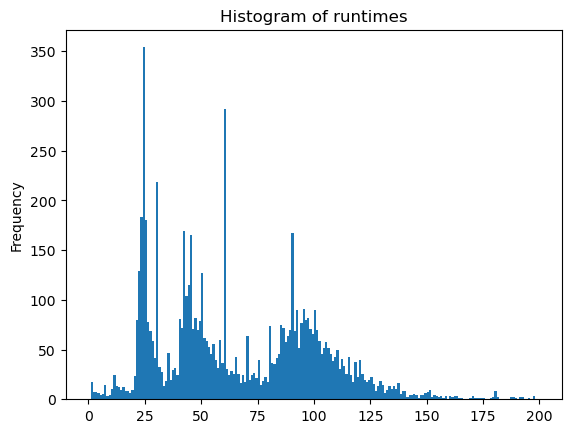

In [21]:
data.runtime.plot(kind='hist', title="Histogram of runtimes", range=(0,200), bins=200)

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [24]:
#16266 votes are needed in the least for a movie to be inn the top 10% most voted film
top_10p_votes = data['votes'].quantile(0.90)
top_10p_votes

16266.200000000015

## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [26]:
df_meta = pd.read_csv("./data/movies_metadata.csv",low_memory=False)

In [29]:
merge_df = pd.merge(df, df_meta, left_on='MOVIES', right_on='title', how='inner')

In [30]:
merge_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,adult,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,False,...,1995-02-24,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Surviving the streets was just a rehearsal.,The Walking Dead,False,6.6,4.0
1,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,False,...,1936-03-14,0.0,66.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,HE DIED a man with a hunger to love... and ret...,The Walking Dead,False,6.6,14.0
2,Lucifer,(2016–2021),"\nCrime, Drama, Fantasy",8.1,\nLucifer Morningstar has decided he's had eno...,"\n \n Stars:\nTom Ellis, \nLesle...","264,222",42.0,NaN,False,...,2014-10-22,0.0,108.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Lucifer,False,5.8,4.0
3,The Good Doctor,(2017– ),\nDrama,8.1,"\nShaun Murphy, a young surgeon with autism an...","\n \n Stars:\nFreddie Highmore, ...","70,871",41.0,NaN,False,...,2011-01-01,5206.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Do no harm.,The Good Doctor,False,5.0,52.0
4,Supernatural,(2005–2020),"\nDrama, Fantasy, Horror",8.4,\nTwo brothers follow their father's footsteps...,"\n \n Stars:\nJared Padalecki, \...","404,273",44.0,NaN,False,...,1933-05-12,0.0,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Supernatural,False,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,Connected,NaN,\nDocumentary,NaN,\nExploring the intricate and surprising conne...,\n \n Star:\nLatif Nasser\n,NaN,NaN,NaN,False,...,2008-09-25,0.0,110.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,NaN,Connected,False,7.0,20.0
1742,How to Win the US Presidency,(2016),\nDocumentary,6.2,\nThis whimsical look at rough-and-tumble Amer...,\n Director:\nCal Seville\n| \n Stars:\n...,127,50.0,NaN,False,...,2016-08-01,0.0,50.0,[],Released,NaN,How to Win the US Presidency,False,0.0,0.0
1743,Curtain,NaN,NaN,NaN,\nA female nurse escaping traumatic events who...,\n Director:\nMohamed Alsalman\n,NaN,NaN,NaN,False,...,2015-11-19,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Curtain,False,5.4,8.0
1744,Metro,(2008),\nDrama,NaN,\nThe dark heart of the city is the setting fo...,\n Director:\nChristopher Dorrah\n| \n S...,NaN,120.0,NaN,False,...,1997-01-16,31987563.0,117.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,San Francisco's top police hostage negotiator ...,Metro,False,5.3,136.0
